In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
df = pd.read_csv('lending_club_loan_two.csv')

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# **Exploratory Data Analysis**

<Axes: xlabel='loan_status', ylabel='count'>

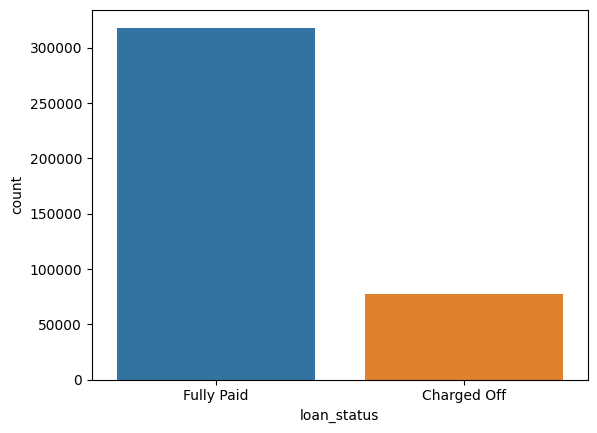

In [244]:
sns.countplot(x='loan_status', data=df)

# **Create a histogram of the loan_amnt column.**

<Axes: xlabel='loan_amnt', ylabel='Count'>

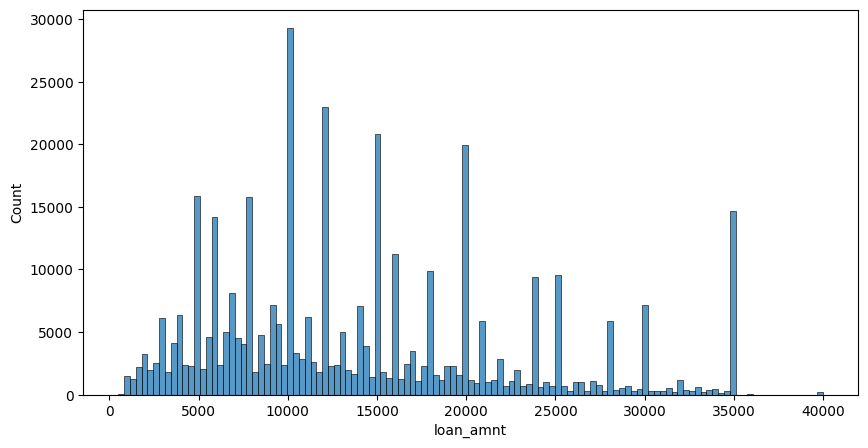

In [245]:
plt.figure(figsize=(10,5))
sns.histplot(df['loan_amnt'],kde = False)

# Let's explore correlation between the continuous feature variables.

In [246]:
df_corr = df.corr()
df_corr

<ipython-input-246-0c96883f2151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


# Visualize this using a heatmap.

(12.5, -0.5)

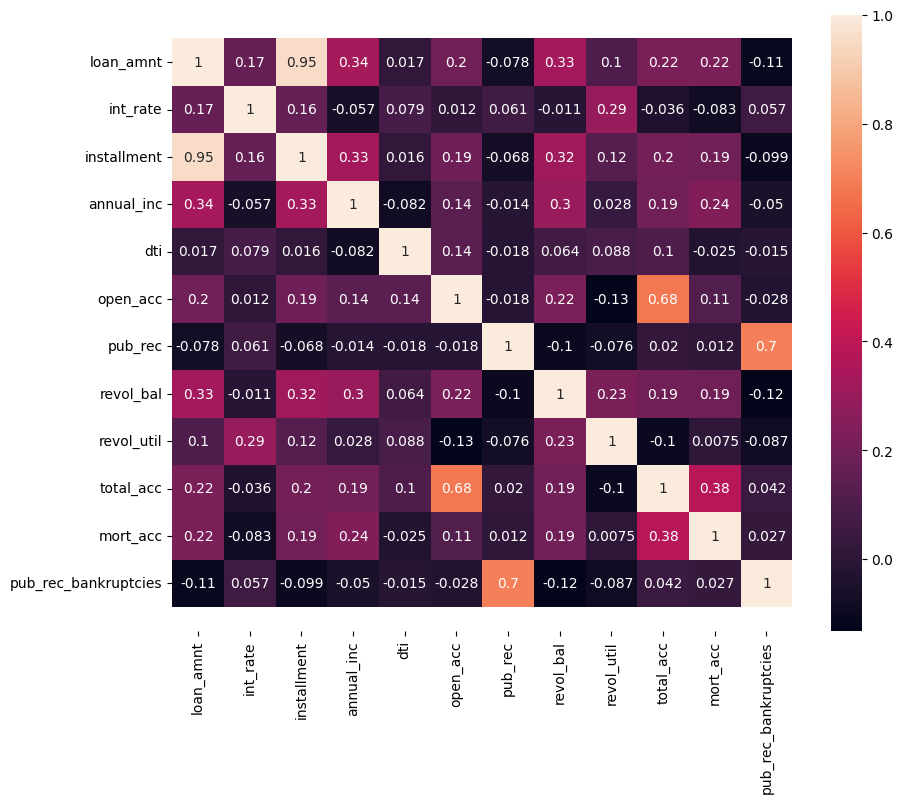

In [247]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**You should have noticed almost perfect correlation with the "installment" feature.**

In [248]:
df_info = pd.read_csv("lending_club_info.csv",index_col='LoanStatNew')
print(df_info.loc['installment']['Description'])

The monthly payment owed by the borrower if the loan originates.


In [249]:
print(df_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

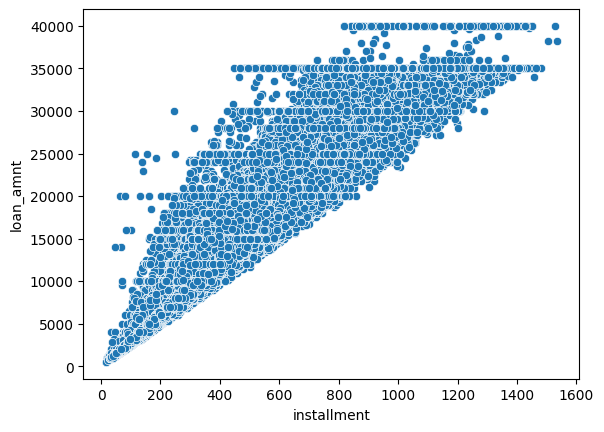

In [250]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

# Creating a boxplot showing the relationship between the loan_status and the Loan Amount.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

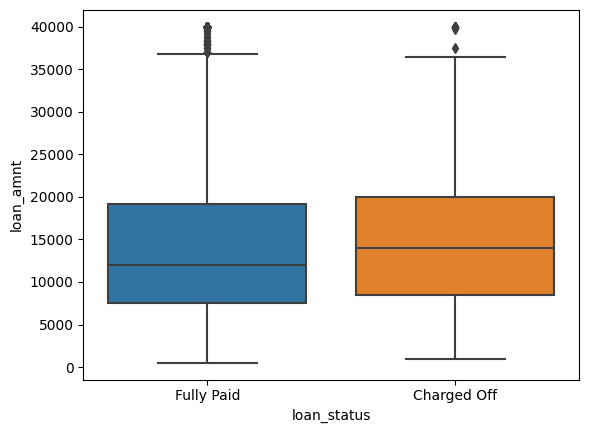

In [251]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

# Calculating the summary statistics for the loan amount, grouped by the loan_status.

In [252]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


# Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [253]:
grades = df['grade'].sort_values().unique().tolist()
grades

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [254]:
sub_grades = df['sub_grade'].sort_values().unique().tolist()
sub_grades

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

# Creating a countplot per grade.

<Axes: xlabel='grade', ylabel='count'>

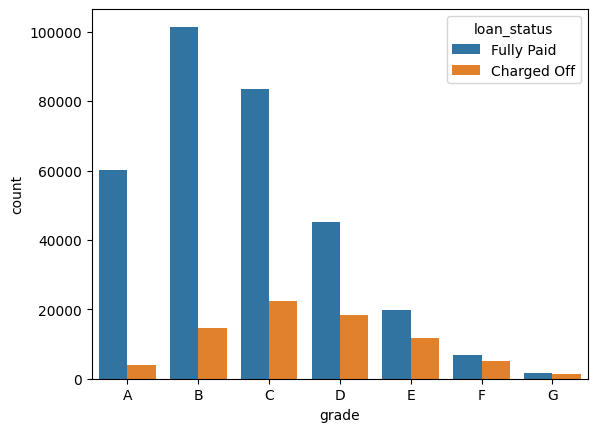

In [255]:
sns.countplot(x='grade', hue='loan_status', data=df, order=grades)

# Displaying the count plot per subgrade.

<Axes: xlabel='sub_grade', ylabel='count'>

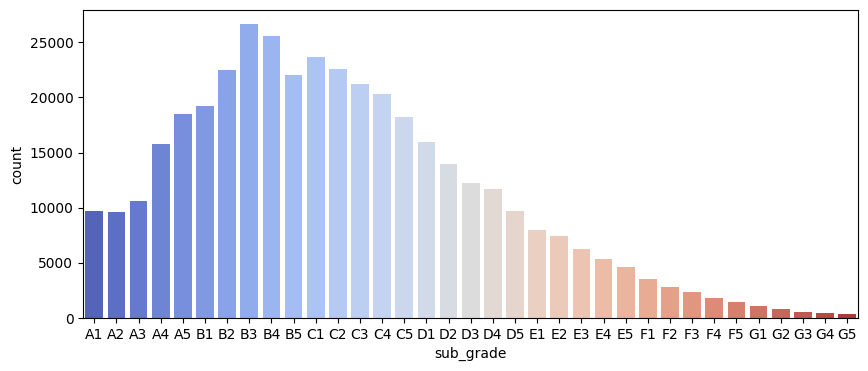

In [256]:
plt.figure(figsize=(10,4))
sns.countplot(x='sub_grade',data=df, order=sub_grades,palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

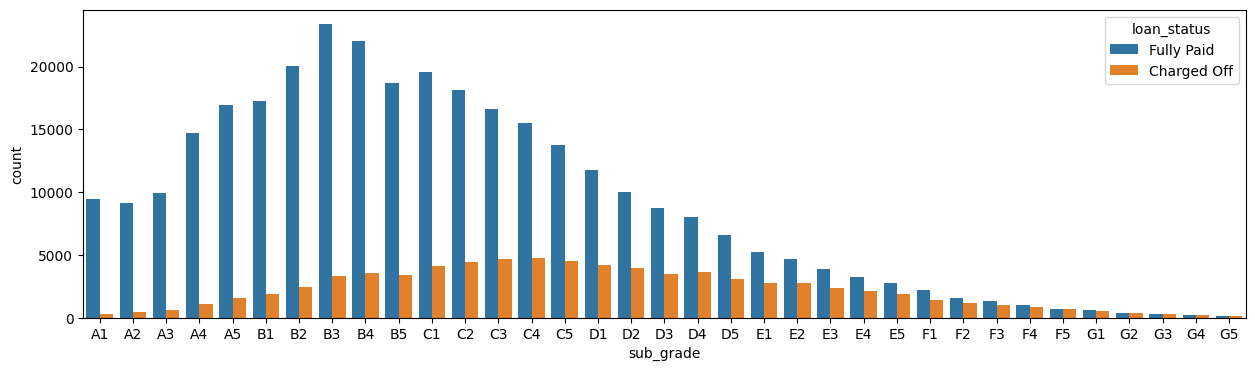

In [257]:
plt.figure(figsize = (15,4))
sns.countplot(x='sub_grade',hue ='loan_status',order=sub_grades, data=df)

**It looks like F and G subgrades don't get paid back that often. Isloating those and recreating the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

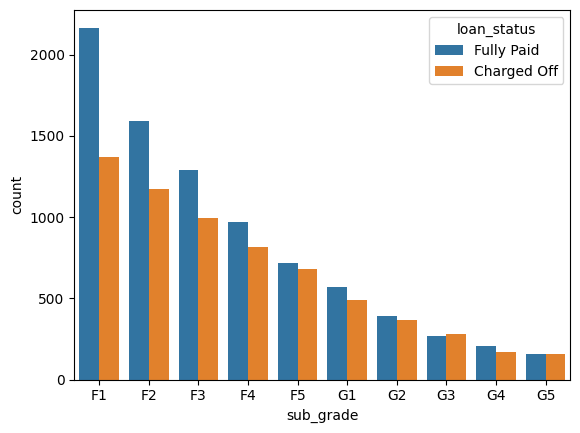

In [258]:
f_g_grades = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
sort = f_g_grades['sub_grade'].sort_values().unique()
sns.countplot(x='sub_grade', hue='loan_status', data=f_g_grades, order=sort)

# Creating a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [259]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [260]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [261]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


# Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column.

<ipython-input-262-84269d723ac1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<Axes: >

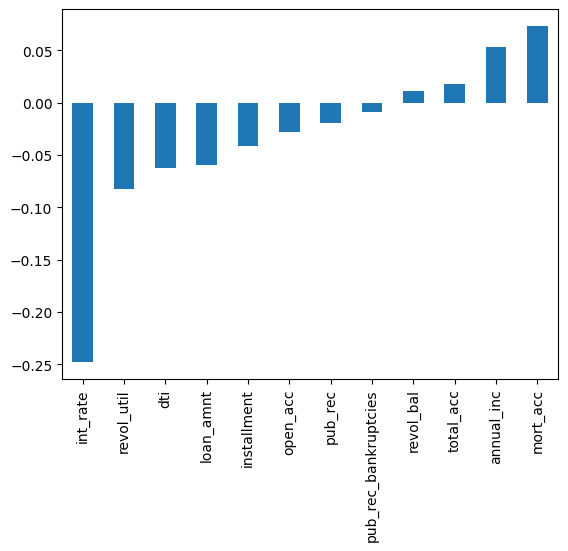

In [262]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Data PreProcessing
# Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [263]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**Missing Data
Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

# What is the length of the dataframe?

In [264]:
len(df)

396030

**Creating a Series that displays the total count of missing values per column.**

In [265]:
miss_val = pd.Series(df.isna().sum())
miss_val

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Converting this Series to be in term of percentage of the total DataFrame**

In [266]:
miss_val/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [267]:
print(df_info.loc['emp_title']['Description'])
print('\n')
print(df_info.loc['emp_length']['Description'])

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


Let's check how many unique employment job titles are there

In [268]:
len(df['emp_title'].unique())

173106

In [269]:
df.emp_title.value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

# Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [270]:
df = df.drop('emp_title',axis = 1)

**Creating a count plot of the emp_length feature column.**

In [271]:
emp_len_list = df['emp_length'].dropna().unique().tolist()
emp_len_list

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year']

In [272]:
emp_len_sort = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

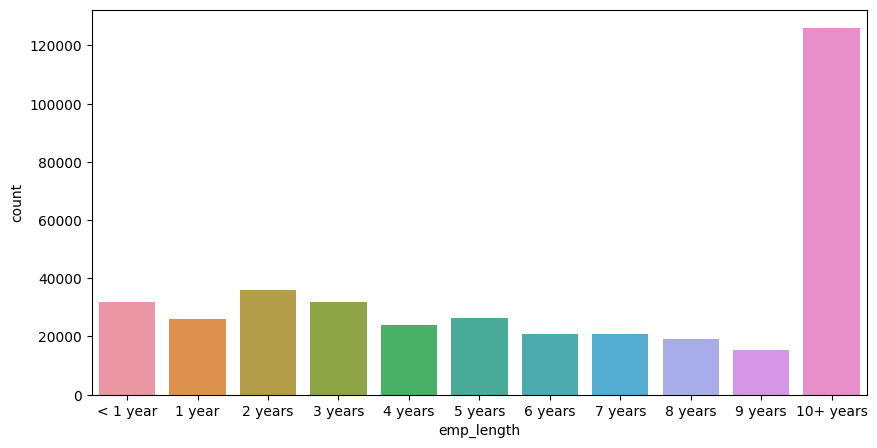

In [273]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',order = emp_len_sort,data=df)

# Plot out the countplot with a hue separating Fully Paid vs Charged Off

<Axes: xlabel='emp_length', ylabel='count'>

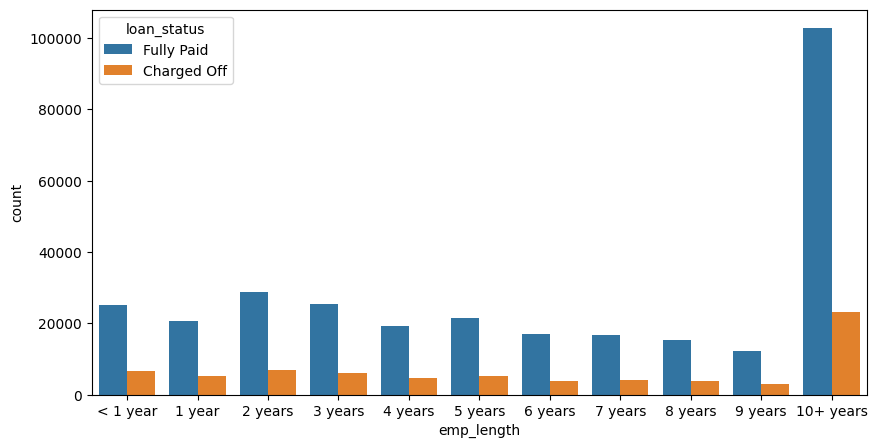

In [274]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length' ,hue = 'loan_status', order = emp_len_sort,data=df)

**This doesn't really say anything about relationship between employment length and being charged off, we want if the percentage of charge offs per category. we need what percent of people per employment category didn't pay back their loan.**

In [275]:
charged_cnt = df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()
charged_cnt

10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: emp_length, dtype: int64

In [276]:
total_ppl = df[(df['loan_status'] == 'Charged Off') | (df['loan_status'] == 'Fully Paid')]['emp_length'].value_counts()
total_ppl

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [277]:
percent_per_cat = charged_cnt/total_ppl
percent_per_cat

1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: emp_length, dtype: float64

<Axes: >

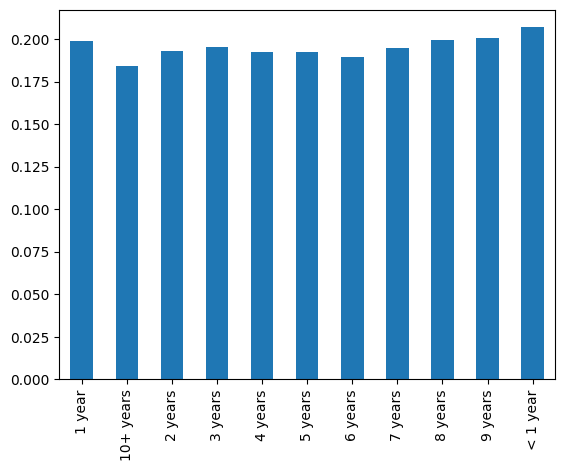

In [278]:
percent_per_cat.plot(kind = 'bar')

**Since the Charge off rates are extremely similar across all employment lengths, drop the emp_length column.**

In [279]:
df = df.drop('emp_length', axis = 1)

**we will check the DataFrame to see what feature columns still have missing data.**

In [280]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column. Is this repeated information?**

In [281]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [282]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**Since the title column is simply a string subcategory/description of the purpose column, drop the title column.**

In [283]:
df = df.drop('title',axis =1)

In [284]:
print(df_info.loc['mort_acc']['Description'])

Number of mortgage accounts.


**Creating a value_counts of the mort_acc column.**

In [285]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean, or you could even bin the columns into categories and then set NaN as its own category. Since there is no 100% correct approach! Let's review the other columns to see which most highly correlates to mort_acc

In [286]:
print('Correlation with the mort_acc column')
df.corrwith(df['mort_acc'],axis=0).sort_values()

Correlation with the mort_acc column


<ipython-input-286-0e27f1467ca8>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['mort_acc'],axis=0).sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
dtype: float64

**Looks like the total_acc feature correlates with the mort_acc ,Let's try this fillna() approach. Grouping the dataframe by the total_acc and calculating the mean value for the mort_acc per total_acc entry.**

In [287]:
print('Mean of mort_acc column per total_acc')
total_acc_avg = df['mort_acc'].groupby(df['total_acc'],axis=0).mean()
total_acc_avg

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [288]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [289]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [290]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So removing the rows that are missing those values in those columns with dropna().**

In [291]:
df = df.dropna()

In [292]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Variables and Dummy Variables
**The missing data part is done! Now let's deal with the string values due to the categorical columns.**

In [293]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**Let's now go through all the string features to see what we should do with them. Converting the term feature into either a 36 or 60 integer numeric data type**

In [294]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [295]:
df['term'] = df['term'].map({' 36 months':36, ' 60 months':60})

In [296]:
df['term'].unique()

array([36, 60])

# Grade feature
**As grade is part of sub_grade, so dropping the grade feature.**

In [297]:
df = df.drop('grade',axis = 1)

Converting the subgrade into dummy variables. Then concatenating these new columns to the original dataframe.

In [298]:
sub_dummies = pd.get_dummies(df['sub_grade'], drop_first= True)

In [299]:
df = pd.concat([df.drop('sub_grade',axis = 1),sub_dummies], axis = 1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [300]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

# verification_status, application_type,initial_list_status,purpose
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenating them with the original dataframe.**

In [301]:
col_dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

In [302]:
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis = 1),col_dummies],axis = 1)

In [303]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

**Reviewing the value_counts for home_ownership column**

In [304]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Converting these to dummy variables, but that replacing NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then to concatenate them with the original dataframe.

In [305]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [306]:
home_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis =1),home_dummies],axis = 1)

Creating a column called 'zip_code' that extracts the zip code from the address column.

In [307]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [308]:
zip_dummy = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),zip_dummy],axis =1)

In [309]:
df = df.drop('address',axis=1)

**issue_date
This would be data leckage we don't know beforehand whether or not a loan would be issued when using our model**

In [310]:
df = df.drop('issue_d',axis=1)

earliest_cr_line
we only need year so we fetch the year and then we will convert it into numeric format.


In [311]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda year:int(year[-4:]))

In [312]:
df = df.drop('earliest_cr_line',axis=1)

In [313]:
df.select_dtypes(include=['object']).columns

Index(['loan_status'], dtype='object')

# Train and test data

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
#dropping the load_status column we created earlier, since its a duplicate of the loan_repaid column.
df = df.drop('loan_status',axis=1)

In [316]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39522


In [317]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [318]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

# Normalizing the Data

In [319]:
from sklearn.preprocessing import MinMaxScaler

In [320]:
norm = MinMaxScaler()

In [321]:
X_train = norm.fit_transform(X_train)

In [322]:
X_test = norm.transform(X_test)

# Creating the Model

In [323]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [324]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [325]:
model.fit(x = X_train,y = y_train,epochs = 25,batch_size = 256,validation_data= (X_test,y_test))

Epoch 1/25
124/124 [==============================] - 2s 6ms/step - loss: 0.4725 - val_loss: 0.3508
Epoch 2/25
124/124 [==============================] - 1s 5ms/step - loss: 0.3282 - val_loss: 0.2844
Epoch 3/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2923 - val_loss: 0.2766
Epoch 4/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2816 - val_loss: 0.2741
Epoch 5/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2760 - val_loss: 0.2722
Epoch 6/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2733 - val_loss: 0.2707
Epoch 7/25
124/124 [==============================] - 1s 6ms/step - loss: 0.2688 - val_loss: 0.2700
Epoch 8/25
124/124 [==============================] - 1s 7ms/step - loss: 0.2688 - val_loss: 0.2705
Epoch 9/25
124/124 [==============================] - 1s 7ms/step - loss: 0.2667 - val_loss: 0.2697
Epoch 10/25
124/124 [==============================] - 1s 7ms/step - loss: 0.2655 - val_loss: 0.2690

In [326]:
model.save('loan_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Evaluating Model Performance.**

In [327]:
losses = pd.DataFrame(model.history.history)

<Axes: >

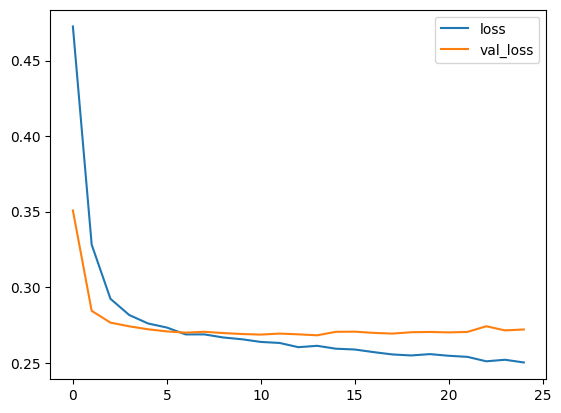

In [328]:
losses[['loss','val_loss']].plot()

**Creating predictions from the X_test set.**

In [329]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

248/248 [==============================] - 0s 2ms/step


In [330]:
from sklearn.metrics import classification_report,confusion_matrix

In [331]:
predictions_prob = model.predict(X_test)

threshold = 0.5

predictions_classes = (predictions_prob > threshold).astype(int)

print(classification_report(y_test, predictions_classes))

248/248 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.44      0.60      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.91      0.71      0.76      7905
weighted avg       0.89      0.88      0.87      7905



In [332]:
print(confusion_matrix(y_test,predictions_classes))

[[ 683  887]
 [  37 6298]]


# Verification
**Given the customer below, does this person repay the loan?**

In [333]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   36.00
int_rate                7.90
installment           782.26
annual_inc          62000.00
                      ...   
48052                   0.00
70466                   1.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 385487, Length: 78, dtype: float64

In [334]:
model.predict(new_customer.values.reshape(1,78))

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)

**Now let's check, did this person actually end up paying back their loan?**

In [335]:
df.iloc[random_ind]['loan_repaid']

1.0